<a href="https://colab.research.google.com/github/ankirani/Sleep-Duration-Prediction/blob/main/Sleep_Duration_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import necessary libraries

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###Import dataset

In [ ]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


##Data Preprocessing

###Check missing value

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### Filling missing value

In [ ]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Good Sleep')

###Check duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

###Split Blood Pressure into Systolic and Diastolic

In [ ]:
def split_bp(bp):
  try:
    systolic, diastolic = map(int, bp.split('/'))
    return pd.Series([systolic, diastolic])
  except:
    return pd.Series([np.nan, np.nan])

bp_split = df['Blood Pressure'].apply(split_bp)
bp_split.columns = ['Systolic', 'Diastolic']
df = pd.concat([df, bp_split], axis=1)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Good Sleep,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Good Sleep,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Good Sleep,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
df = df.drop(columns=['Blood Pressure'])
df = df.drop(columns=['Person ID'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Good Sleep,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Good Sleep,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Good Sleep,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


###Divide columns into categorical and numeric

In [ ]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level',
                'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

###Statistical Summary

In [ ]:
print("Statistical Summary (Numerical Variables):")
print(df[numeric_cols].describe())

Statistical Summary (Numerical Variables):
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps    Systolic   Diastolic  
count    374.000000  374.000000    374.000000  374.000000  374.000000  
mean       5.385027   70.165775   6816.844920  128.553476   84.649733  
std        1.774526 

###Visualize Box Plot to detect the outliers

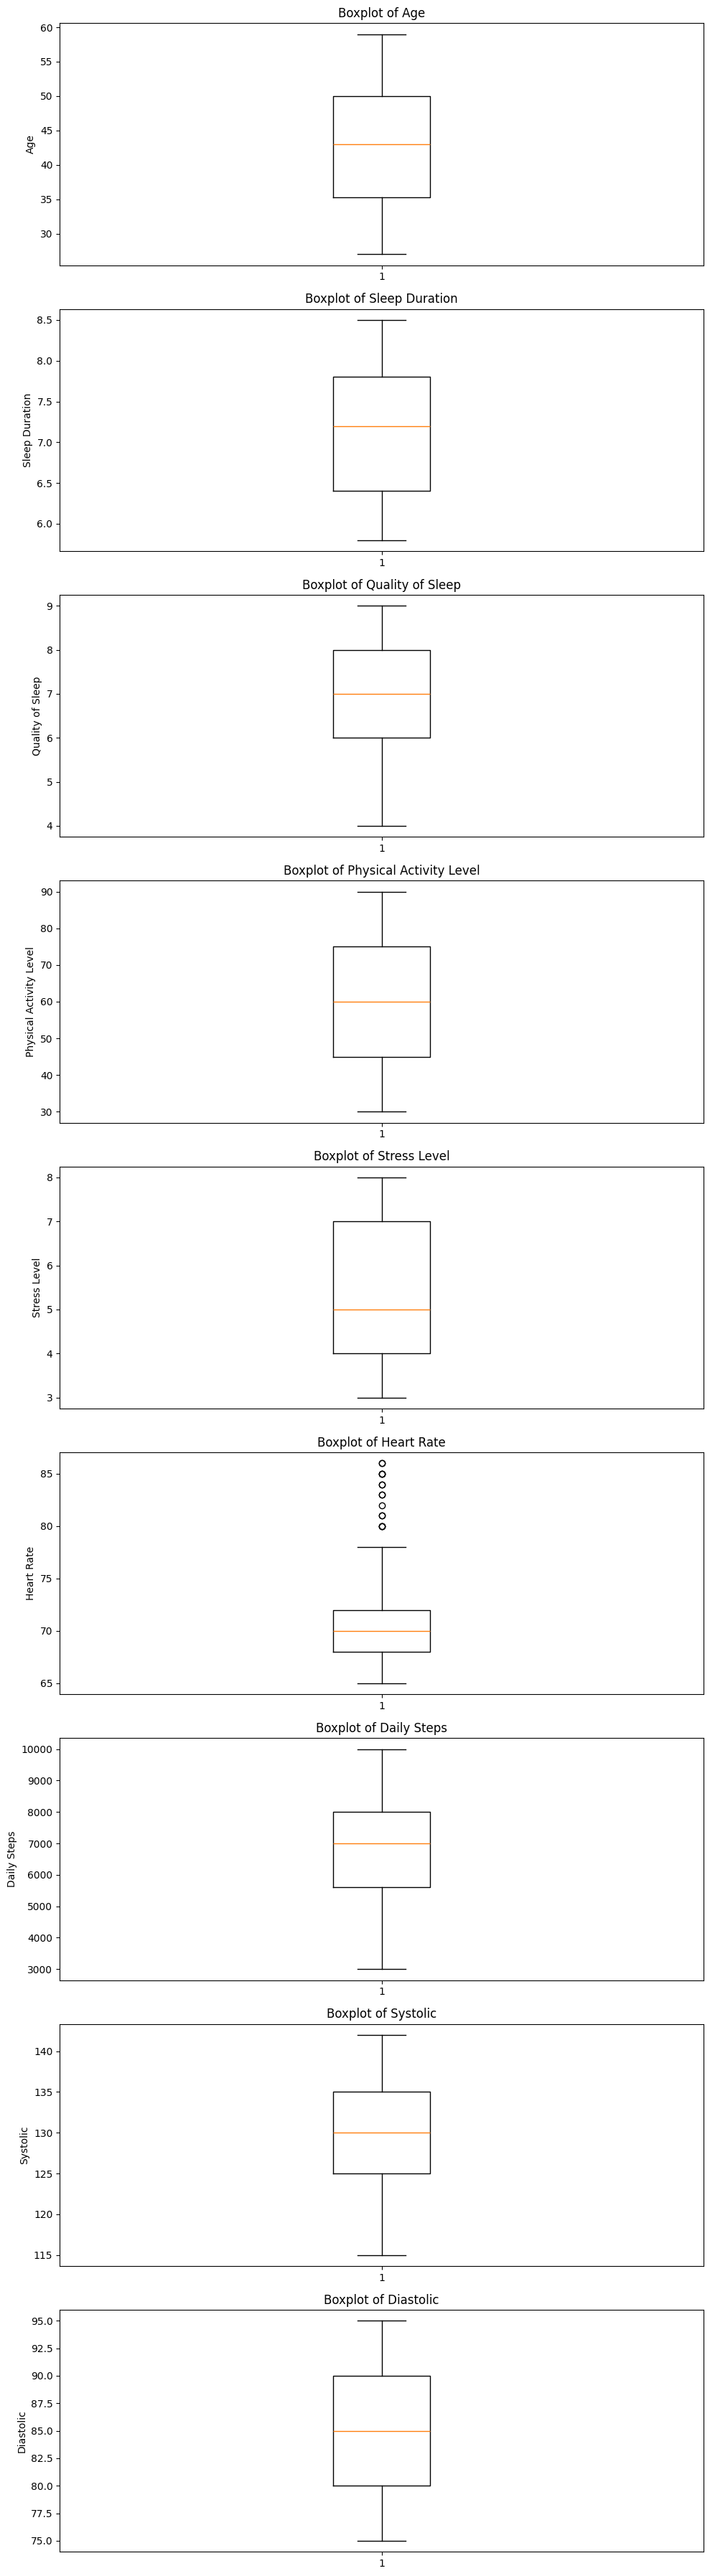

In [ ]:
n = len(numeric_cols)
fig, axes = plt.subplots(n, 1, figsize=(10, 4*n))

#create boxplot
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

###Remove the outliers using Z-Score

In [ ]:
from scipy.stats import zscore

# Drop rows with missing values in these columns
df_clean = df.dropna(subset=numeric_cols)

# Calculate Z-scores for the selected columns
z_scores = df_clean[numeric_cols].apply(zscore)

# Define a threshold for outliers
threshold = 3

# Create a boolean mask for outliers
outliers_mask = (z_scores.abs() > threshold)

# Combine the mask across all columns (row is an outlier if any column is)
outliers_combined = df_clean[outliers_mask.any(axis=1)]

# Print outliers
print(outliers_combined)

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
5      Male   28     Software Engineer             5.9                 4   
93     Male   35                Lawyer             7.4                 7   
145  Female   38                Lawyer             7.4                 7   
264    Male   48                Doctor             7.3                 7   
266    Male   48                Doctor             7.3                 7   
276    Male   49                Doctor             8.1                 9   
277    Male   49                Doctor             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
3                         30             8        Obese          85   
4                         30             8        Obese          85   
5                         

In [ ]:
#create mask for non-outliers
non_outliers_mask = (z_scores.abs() <= threshold).all(axis=1)

#apply the mask to keep only non-outliers rows
df_no_outliers = df_clean[non_outliers_mask].copy()

#print the cleaned dataset without outliers
print(df_no_outliers.shape)

(365, 13)


In [ ]:
df = df_no_outliers
print(df.head())

  Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27  Software Engineer             6.1                 6   
1   Male   28             Doctor             6.2                 6   
2   Male   28             Doctor             6.2                 6   
6   Male   29            Teacher             6.3                 6   
7   Male   29             Doctor             7.8                 7   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
6                       40             7        Obese          82   
7                       75             6       Normal          70   

   Daily Steps Sleep Disorder  Systolic  Diastolic  
0         4200     Good Sleep       126         83  
1        10000     Good Sleep       125         80  
2    

###Visualization of Categorical features after removing outliers

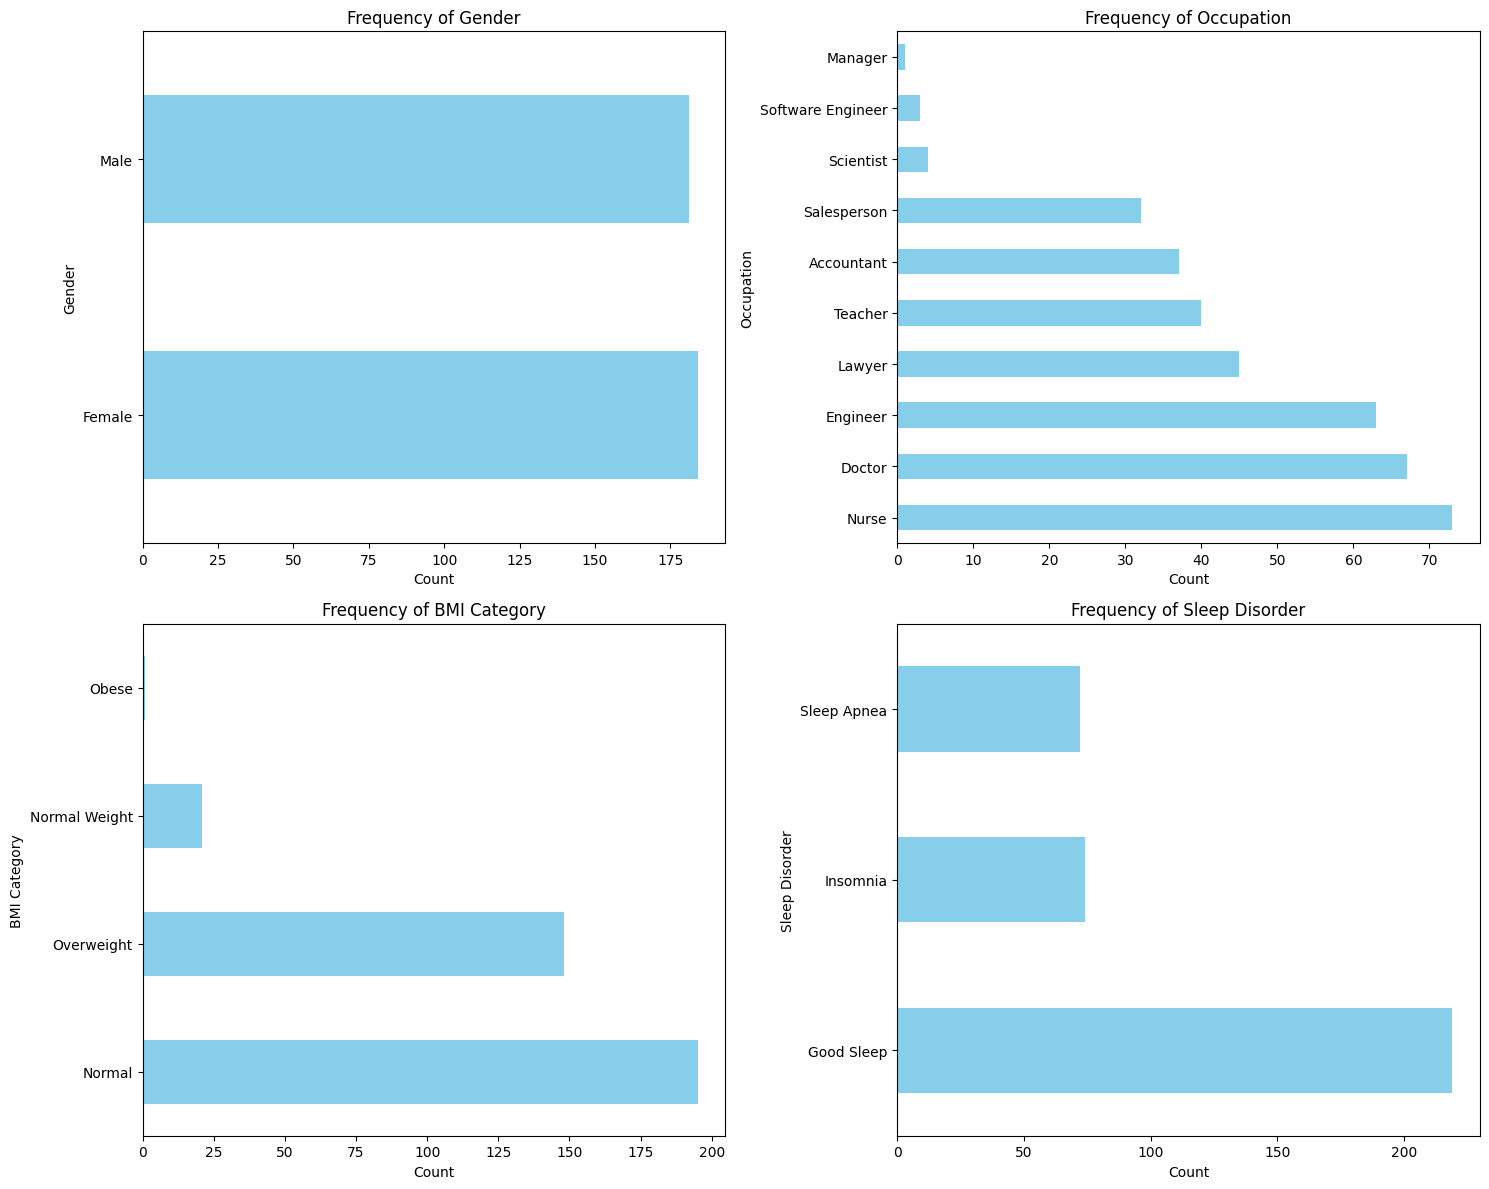

In [ ]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot(kind='barh', color='skyblue')
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

###Correlation Matrix of Numericaal Features

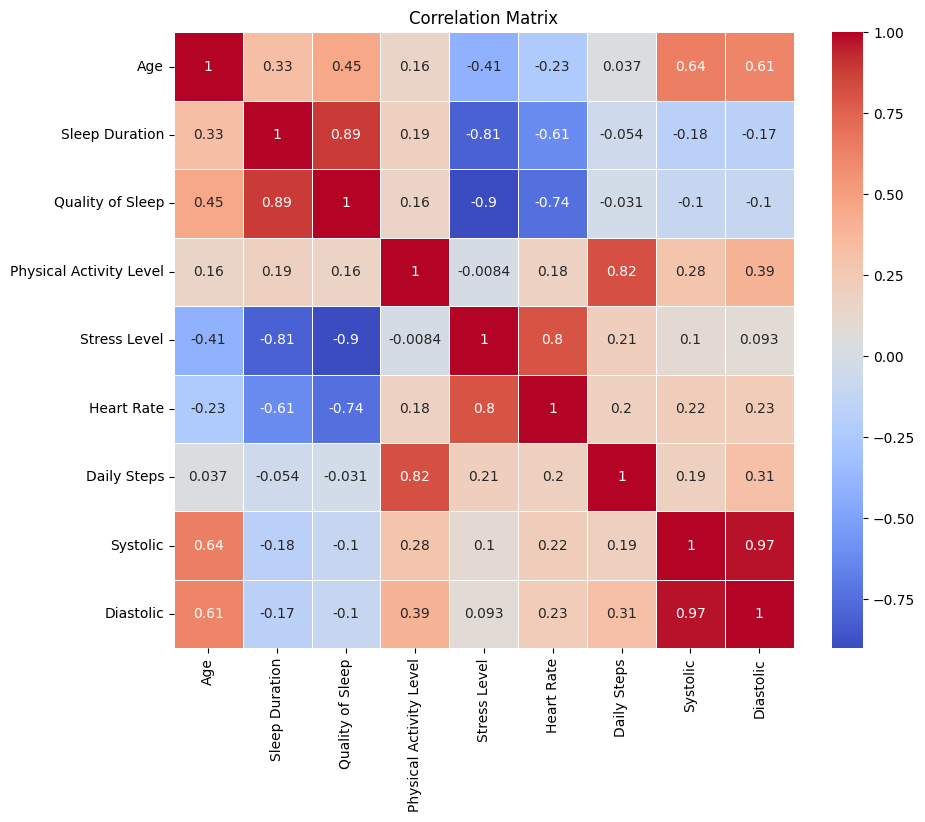

In [ ]:
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###Visualization Sleep Duration vs Categorical Features

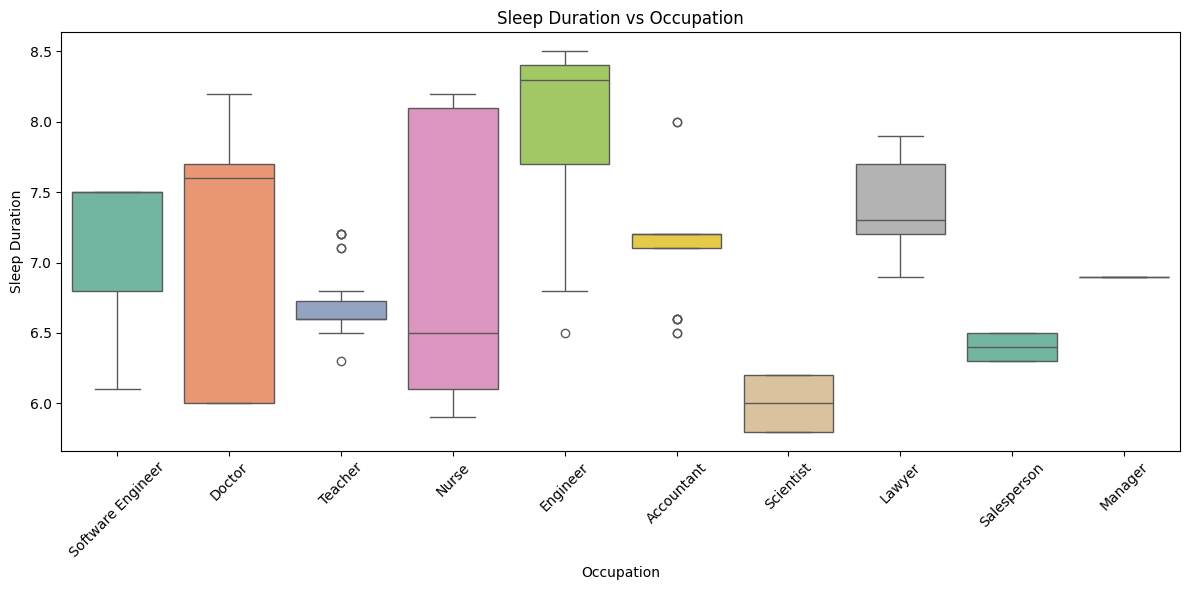

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Sleep Duration vs Occupation')
plt.tight_layout()
plt.show()

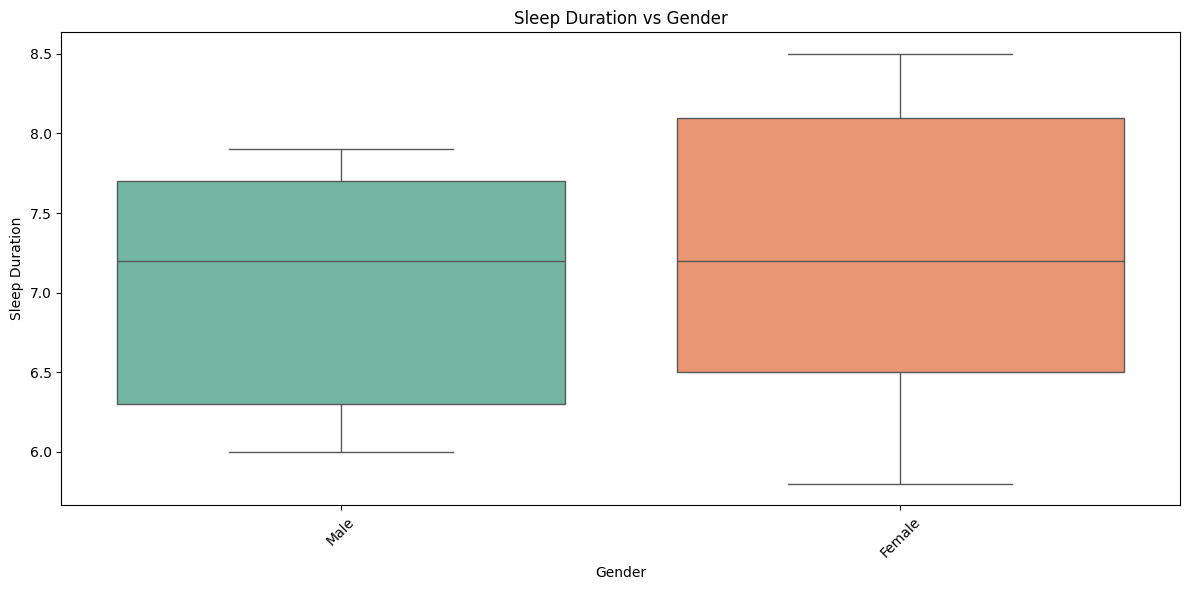

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Sleep Duration vs Gender')
plt.tight_layout()
plt.show()

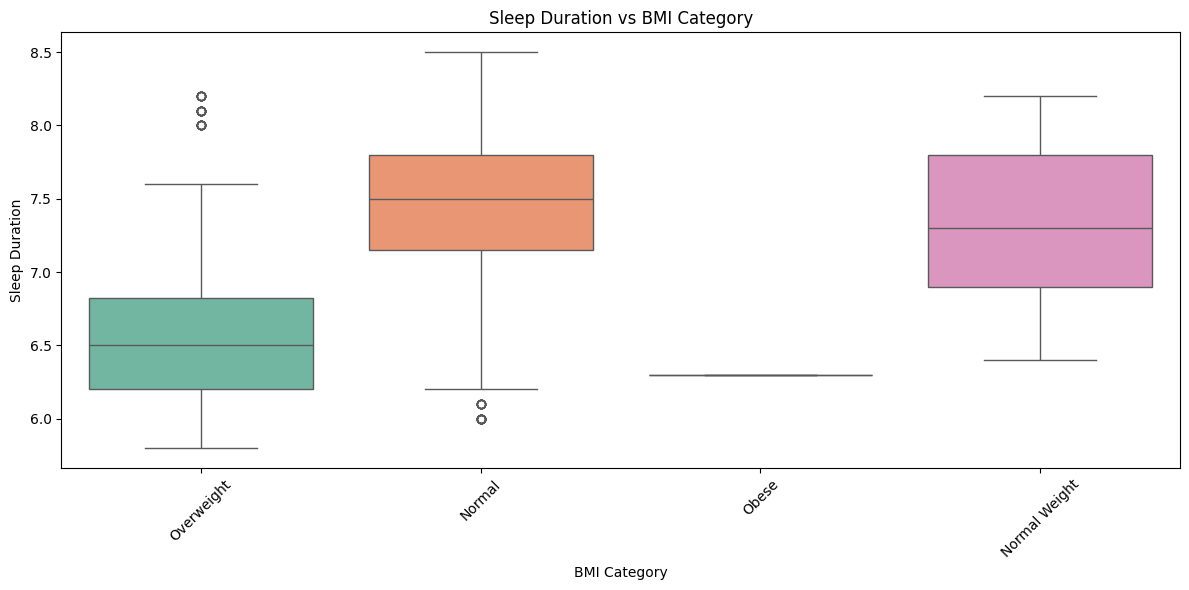

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Sleep Duration vs BMI Category')
plt.tight_layout()
plt.show()

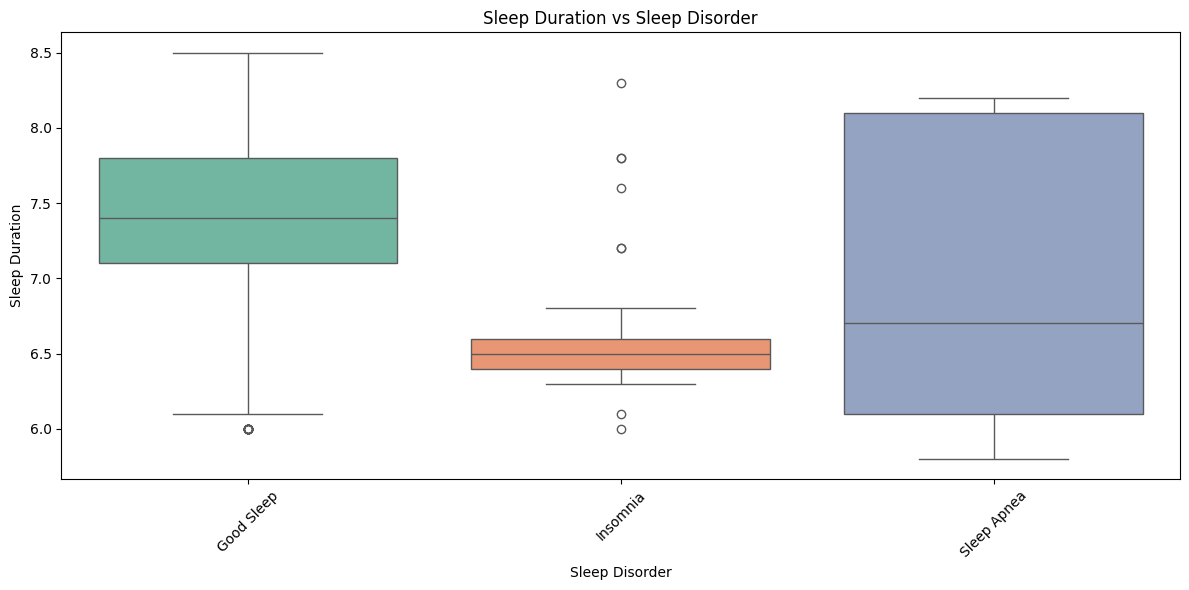

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Sleep Duration vs Sleep Disorder')
plt.tight_layout()
plt.show()

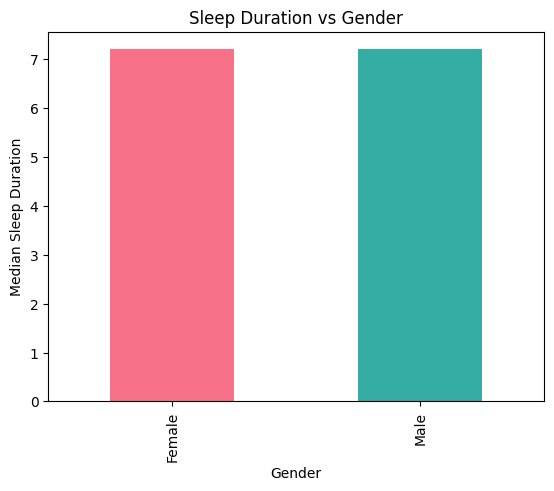

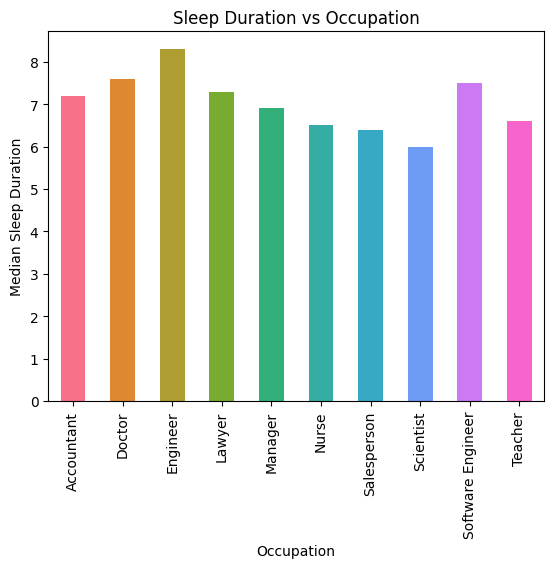

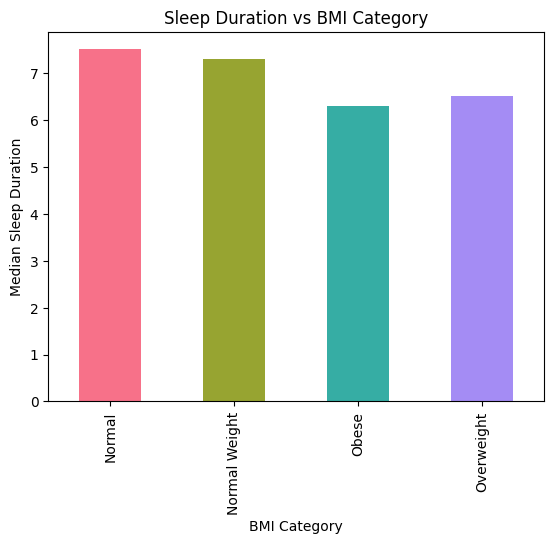

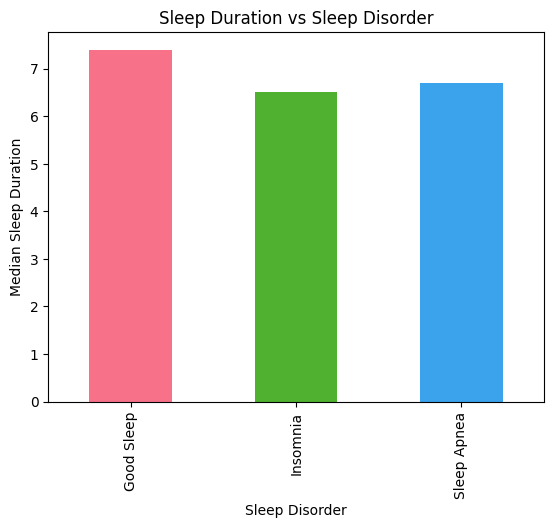

In [ ]:
colors = sns.color_palette('husl', len(df))  # or use 'Set2', 'pastel', etc.

for feature in categorical_cols:
    data = df.copy()
    grouped_data = data.groupby(feature)['Sleep Duration'].median()

    # Generate a unique color for each bar
    bar_colors = sns.color_palette('husl', len(grouped_data))  # you can change the palette

    grouped_data.plot.bar(color=bar_colors)
    plt.xlabel(feature)
    plt.ylabel('Median Sleep Duration')
    plt.title(f'Sleep Duration vs {feature}')
    plt.show()

###Visualization Sleep Duration vs Numerical Features

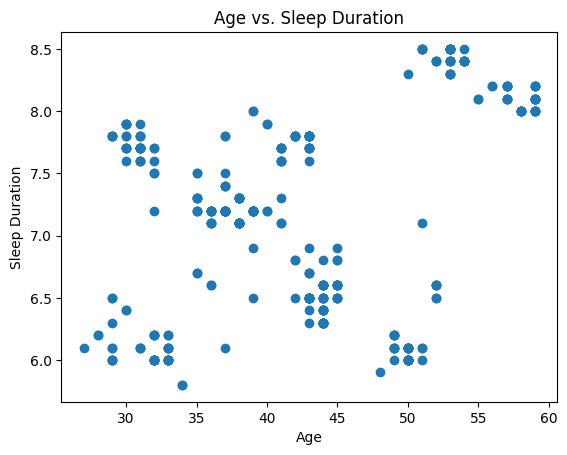

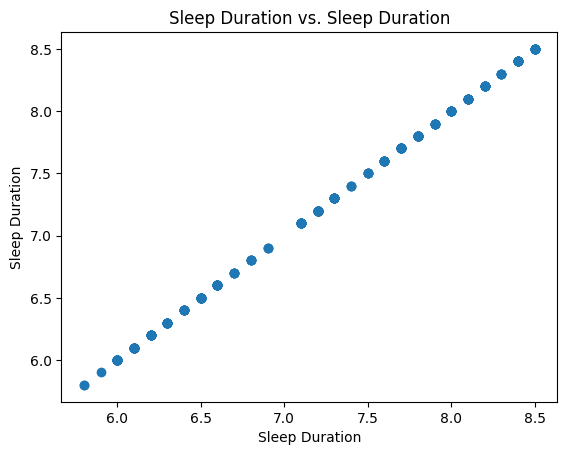

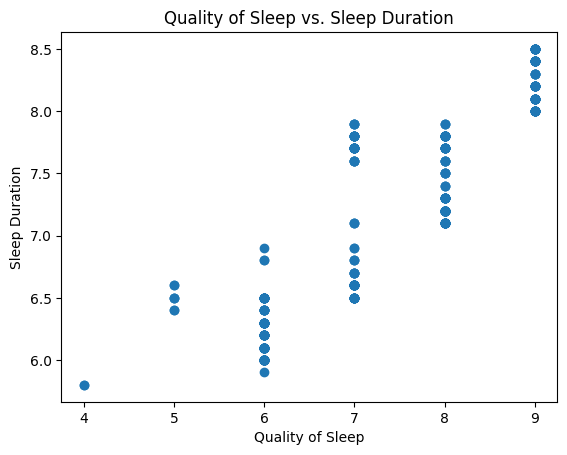

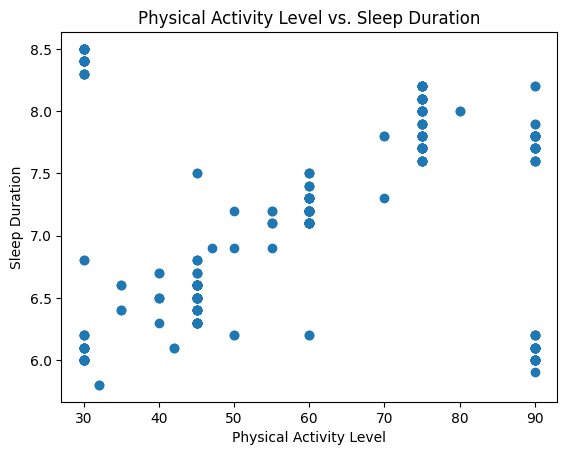

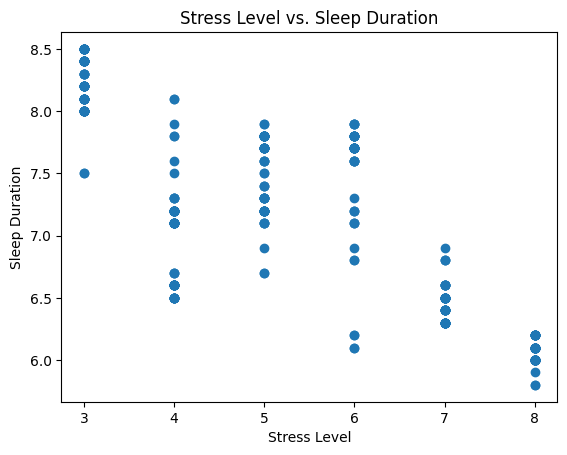

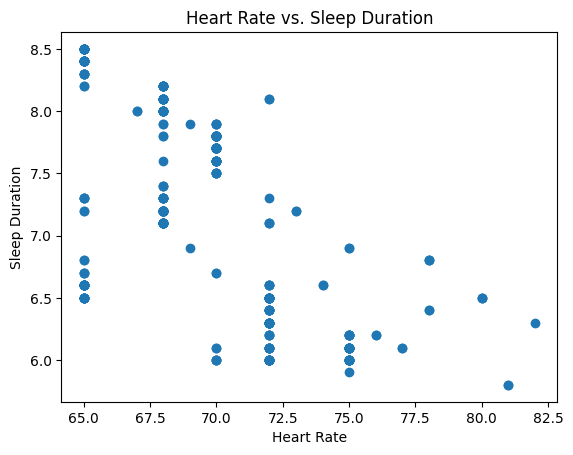

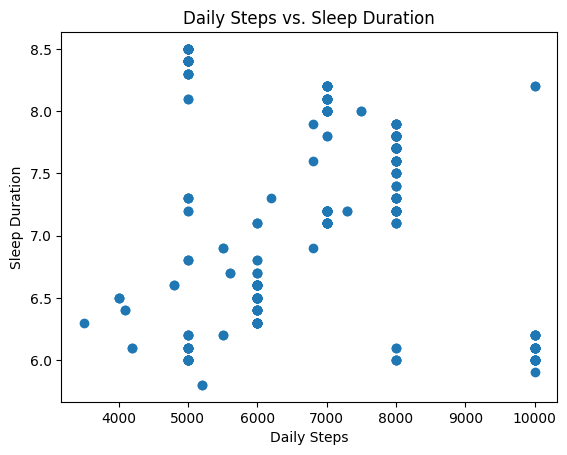

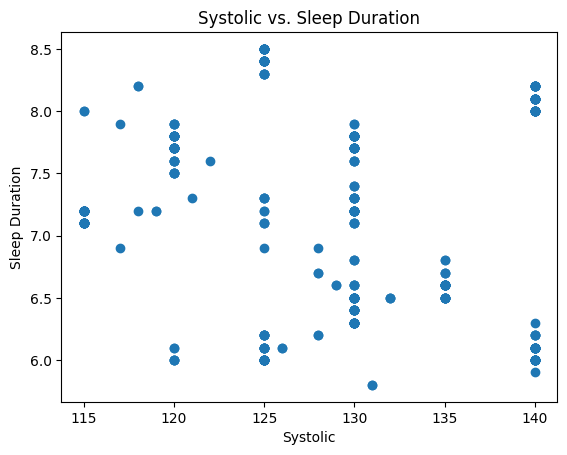

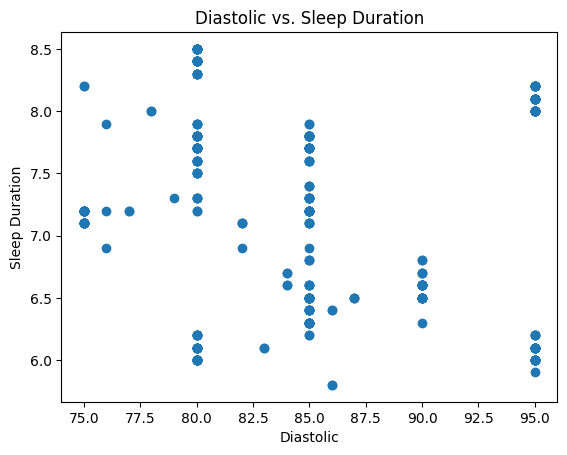

In [ ]:
for feature in numeric_cols:
  data = df.copy()
  plt.scatter(data[feature], data['Sleep Duration'])
  plt.xlabel(feature)
  plt.ylabel('Sleep Duration')
  plt.title(f'{feature} vs. Sleep Duration')
  plt.show()

###Convert categorical to numerical features using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()

le = LabelEncoder()

for col in categorical_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))

In [ ]:
df_label_encoded.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,8,6.1,6,42,6,3,77,4200,0,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
6,1,29,9,6.3,6,40,7,2,82,3500,1,140,90
7,1,29,1,7.8,7,75,6,0,70,8000,0,120,80


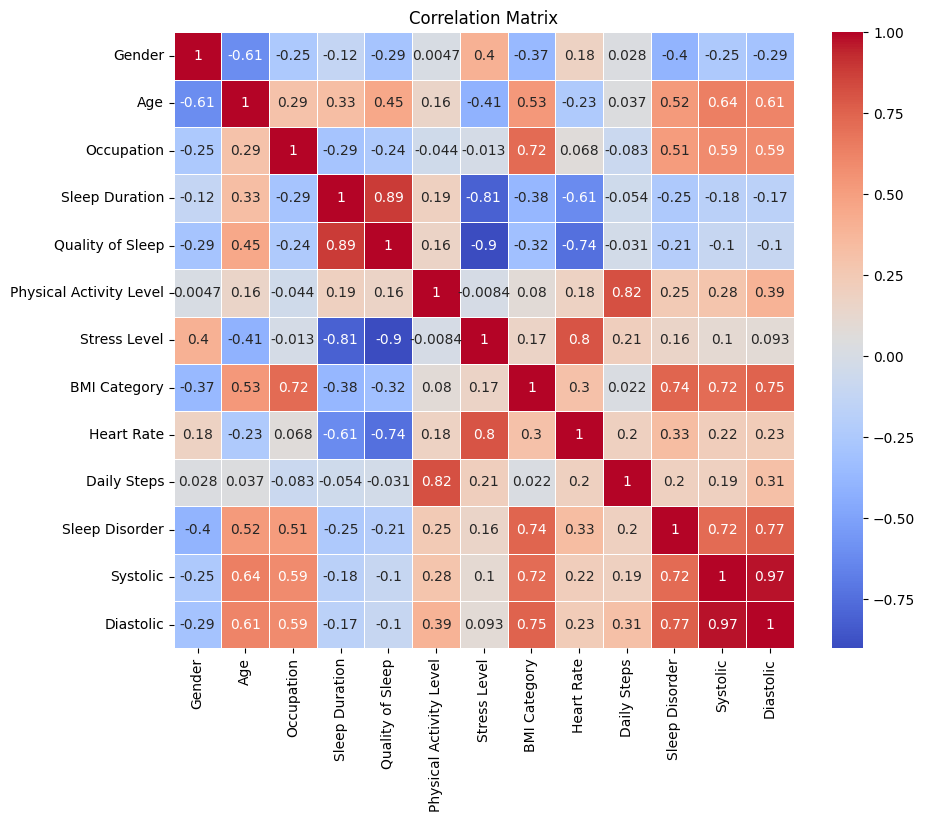

In [ ]:
correlation_matrix = df_label_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###Standardize Num Variables before modelling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_label_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

In [ ]:
print(df_scaled.head())

   Gender       Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1 -1.767343           8       -1.304636         -1.145467   
1       1 -1.651550           1       -1.178526         -1.145467   
2       1 -1.651550           1       -1.178526         -1.145467   
6       1 -1.535758           9       -1.052416         -1.145467   
7       1 -1.535758           1        0.839238         -0.286955   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                -0.828552      0.350039             3    2.056611   
1                 0.036883      1.480696             0    1.484459   
2                 0.036883      1.480696             0    1.484459   
6                -0.924711      0.915368             2    3.486990   
7                 0.758079      0.350039             0    0.054080   

   Daily Steps  Sleep Disorder  Systolic  Diastolic  
0    -1.756870               0 -0.300103  -0.245445  
1     2.013322               0 -0.430973  -0.732335  
2 

##Modeling

###XGBoost installation and import libraries for modelling

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

###Split data for training and testing

In [ ]:
X = df_scaled.drop(columns=['Sleep Duration'])
y = df_scaled['Sleep Duration']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Apply the models

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  results.append({
      'Model': name,
      'Mean Squared Error': mse,
      'R-squared': r2
  })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R-squared', ascending=False))

                    Model  Mean Squared Error  R-squared
1           Random Forest            0.011304   0.989541
3                 XGBoost            0.016795   0.984461
2  Support Vector Machine            0.043471   0.959779
0       Linear Regression            0.135389   0.874733


###Evaluation

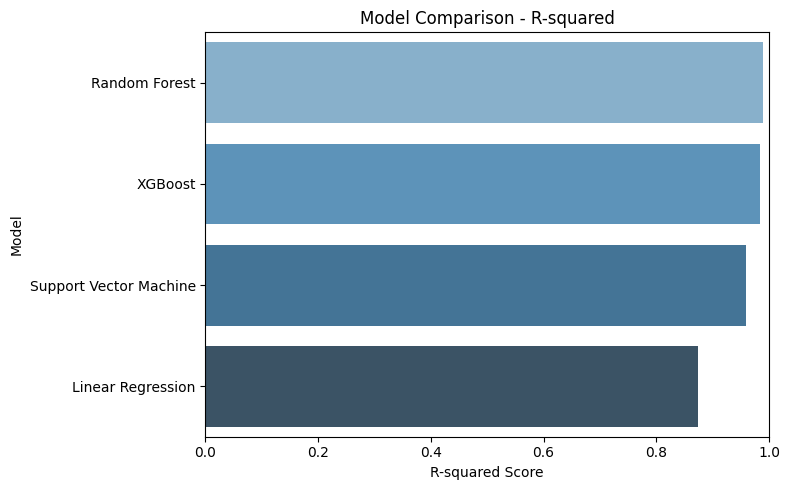

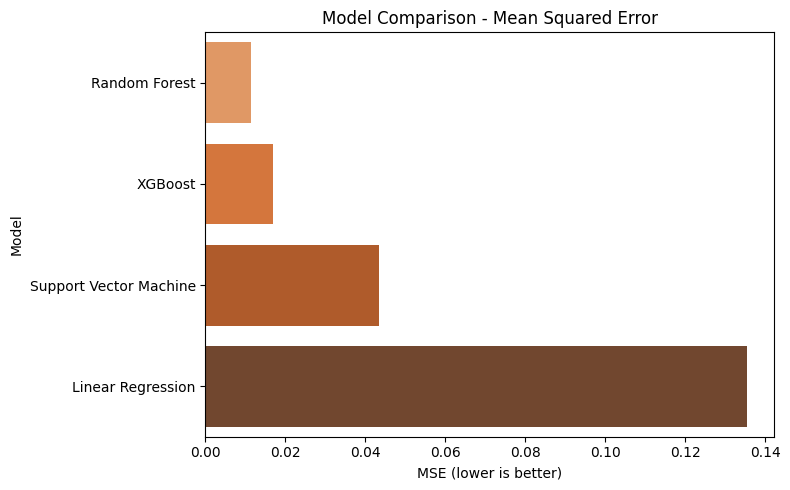

In [ ]:
results_df_sorted = results_df.sort_values(by='R-squared', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df_sorted, x='R-squared', y='Model', palette='Blues_d')
plt.title('Model Comparison - R-squared')
plt.xlabel('R-squared Score')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Plot Mean Squared Error
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df_sorted, x='Mean Squared Error', y='Model', palette='Oranges_d')
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('MSE (lower is better)')
plt.tight_layout()
plt.show()

###Feature Importance from Best Model

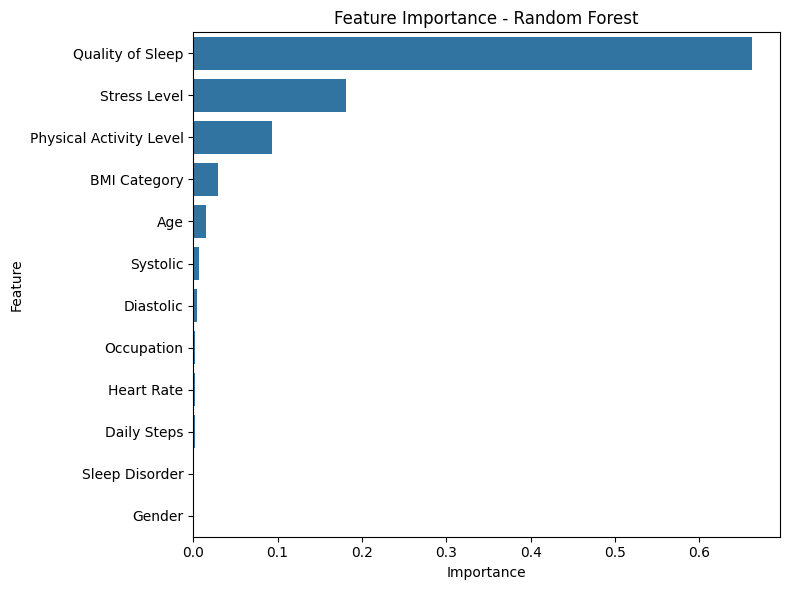

In [ ]:
importances = models['Random Forest'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()